# **Aircraft Accident Data Analysis**

### **Project Overview**
This project analyzes aircraft accident data from the National Transportation Safety Board (NTSB) dataset. The goal is to clean, process, and visualize accident trends to derive insights that can help in risk assessment and safety improvements.

### **Key Objectives**
1. **Data Cleaning & Preprocessing** – Handling missing values, duplicates, and inconsistencies.
2. **Exploratory Data Analysis (EDA)** – Identifying trends, distributions, and relationships in the dataset.
3. **Data Visualization** – Creating informative charts to communicate insights.
4. **Business Recommendations** – Providing actionable insights to improve aviation safety.

This notebook will take you through the entire data analysis process, from raw data exploration to final insights.

#### Loading and Exploring the Dataset  
This function **`load_data_information`** performs the following tasks:  
- Reads the dataset from a CSV file.  
- Displays the **first 3 rows** to preview the data.  
- Prints the **shape** (number of rows and columns).  
- Provides an **overview of the dataset's structure** using `info()`.  
The dataset is loaded using `low_memory=False` to handle large datasets efficiently.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data_information (file_path):

    df= pd.read_csv(file_path, low_memory=False) 

    print('\n---Fist 3 rows---')
    print(df.head(3))
    print('\n---df shape---')
    print(df.shape)
    print('\n---df information--')
    print(df.info())
    print('/n --Coluns of Dataset')
    print(list(df.columns))

    return df
file_path="./AviationData_utf8.csv"
df=load_data_information(file_path)


---Fist 3 rows---
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...          Personal         NaN                  4.0   
2          NaN  ...          Personal         NaN                  3.0   

  Total.Serious.Injuries Total.Minor.Injuries Total.Uninjured  \
0                    0.0                  0.0        

#### Checking for Duplicates and Missing Values  
This function **`check_duplicates_missing`**:  
- Identifies duplicate `Event.Id` values.  
- Counts and displays missing values for each column.  
- Helps in assessing data quality before cleaning.

In [3]:
#checks for duplicates and missing values
def check_duplicates_missing(df):
    print('Duplicated')
    print(df['Event.Id'].duplicated().value_counts())
    print('/n missing values')
    print(df.isna().sum())

    return(df)
check_duplicates_missing(df)

Duplicated
Event.Id
False    87951
True       938
Name: count, dtype: int64
/n missing values
Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phas

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


#### Converting Data Types  

- **Converted `Event.Date` & `Publication.Date`** → `datetime` format.  
- **Converted `Latitude` & `Longitude`** → `float`, handling errors gracefully.

In [4]:
#convert date to date time
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')

# Convert 'Latitude' and 'Longitude' to float, handling errors
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
print(df.dtypes[['Event.Date', 'Publication.Date', 'Latitude', 'Longitude']])
print(df[['Event.Date', 'Publication.Date', 'Latitude', 'Longitude']].head(3))

C:\Users\hezronkatila\AppData\Local\Temp\ipykernel_14940\1380211228.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')


Event.Date          datetime64[ns]
Publication.Date    datetime64[ns]
Latitude                   float64
Longitude                  float64
dtype: object
  Event.Date Publication.Date   Latitude  Longitude
0 1948-10-24              NaT        NaN        NaN
1 1962-07-19       1996-09-19        NaN        NaN
2 1974-08-30       2007-02-26  36.922223 -81.878056


###  Checking Unique Values in Categorical Columns  

 **understanding the distribution of categorical variables**.  
This step helps in identifying:
- **Possible inconsistencies** (e.g., different spellings of the same category).
- **Low-frequency categories** that might need to be grouped.
- **Unexpected placeholders** that might exist.

In [5]:
# check unique values of categorical columns
cat_cols = df.select_dtypes(exclude=['number', 'datetime']).columns

for col in cat_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Event.Id:
Event.Id
20001214X45071    3
20001212X19172    3
20001214X45064    2
20001212X17570    2
20001214X37556    2
                 ..
20221213106451    1
20221213106455    1
20221215106461    1
20221220106480    1
20020909X01560    1
Name: count, Length: 87951, dtype: int64

Unique values in Investigation.Type:
Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

Unique values in Accident.Number:
Accident.Number
ERA22LA103    2
DCA22WA089    2
DCA22WA167    2
ERA22LA119    2
CEN22LA149    2
             ..
ERA23FA087    1
WPR23LA065    1
ERA23LA089    1
WPR23LA072    1
MIA82DA029    1
Name: count, Length: 88863, dtype: int64

Unique values in Location:
Location
ANCHORAGE, AK        434
MIAMI, FL            200
ALBUQUERQUE, NM      196
HOUSTON, TX          193
CHICAGO, IL          184
                    ... 
Abu Dhabi,             1
Medellin,              1
Saint Joseph, MO       1
Ronselarestraat,       1
Oxfordshire,           1
Nam

#### Replacing Placeholder Values with NaN  
Some columns contain placeholder values like `'Unknown'`, `'UNK'`, `'Unk'`, `'NONE'`, and `'Unavailable'` instead of missing values.  
- These placeholders can interfere with analysis.  
- So i replaced them with `NaN` to properly handle missing values.

In [6]:
# replca place holders with nall
placeholders = ['Unknown', 'UNK', 'Unk', 'NONE', 'Unavailable']
df.replace(placeholders, np.nan, inplace=True)

#### Standardizing Categorical Column Values  

To ensure consistency in categorical data, all values were converted to lowercase. This prevents duplicates caused by case differences (e.g., "Piper" and "PIPER").  

###### Steps Taken:  
1. Identified all categorical columns (excluding numerical and datetime types).  
2. Converted all string values in these columns to lowercase.  
3. Rechecked unique values to confirm standardization.  

This helps maintain data uniformity and improves accuracy in analysis.

In [7]:
# Convert all categorical columns to lowercase to standardize values
uper_cols = df.select_dtypes(exclude=['number', 'datetime']).columns
df[uper_cols] = df[uper_cols].apply(lambda x: x.str.lower())

# Check unique values again after standardization
for col in uper_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Event.Id:
Event.Id
20001214x45071    3
20001212x19172    3
20001214x45064    2
20001212x17570    2
20001214x37556    2
                 ..
20221213106451    1
20221213106455    1
20221215106461    1
20221220106480    1
20020909x01560    1
Name: count, Length: 87951, dtype: int64

Unique values in Investigation.Type:
Investigation.Type
accident    85015
incident     3874
Name: count, dtype: int64

Unique values in Accident.Number:
Accident.Number
era22la103    2
dca22wa089    2
dca22wa167    2
era22la119    2
cen22la149    2
             ..
era23fa087    1
wpr23la065    1
era23la089    1
wpr23la072    1
mia82da029    1
Name: count, Length: 88863, dtype: int64

Unique values in Location:
Location
anchorage, ak      548
miami, fl          275
houston, tx        271
albuquerque, nm    265
chicago, il        256
                  ... 
star valley, az      1
bignell, ne          1
winnipeg,            1
amman,               1
aguilar, co          1
Name: count, Length: 2197

#### Handling Missing Values  
To ensure data consistency, I:  
1. Removed duplicate rows based on `Event.Id`.  
2. Droped columns where more than 50% of values are missing.  
3. Filled missing values in numeric columns using:  
   - **Mean** (for normally distributed data)  
   - **Median** (for skewed data)  
4. Filled missing values in categorical columns with the most frequent value (mode).

In [8]:
#working with missing values

def filling_missing(df):
    df = df.drop_duplicates(subset=['Event.Id'], keep='first')

    # Droping columns with more than 50% missing values
    df = df.dropna(thresh=0.5* len(df), axis=1)

    # Filling missing values in numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].isna().sum() > 0:
            skewness = df[col].skew()
            fill_value = df[col].mean() if abs(skewness) < 0.5 else df[col].median()
            df[col].fillna(fill_value, inplace=True)
   #  Filling missing values in categorical columns
    for col in df.select_dtypes(exclude=['number']).columns:
        if df[col].isna().sum() > 0:
            most_frequent = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
            df[col].fillna(most_frequent, inplace=True)
        

    return df

df = filling_missing(df)

C:\Users\hezronkatila\AppData\Local\Temp\ipykernel_14940\559727326.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_value, inplace=True)
C:\Users\hezronkatila\AppData\Local\Temp\ipykernel_14940\559727326.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

###  Final Check: Missing Values & Duplicates
After handling missing values and removing duplicates, I verified:
- Are there still missing values in any column?
- Are there still duplicate `Event.Id` values?

In [9]:
#check if null and  duplicate wer droped
print(df.isna().sum())
print(df['Event.Id'].duplicated().value_counts())

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64
Event.Id
False    87951
Name: count, dtype: int64


### Outlier Detection: Injury Data  
To identify potential **outliers** in injury-related columns, i used a **boxplot**.  
The boxplot helps visualize:
- **Skewness** in injury distributions.
- **Extreme values** that might indicate data entry errors or significant incidents.
  
The columns analyzed:
- **Total.Fatal.Injuries**  
- **Total.Serious.Injuries**  
- **Total.Minor.Injuries**  
- **Total.Uninjured**

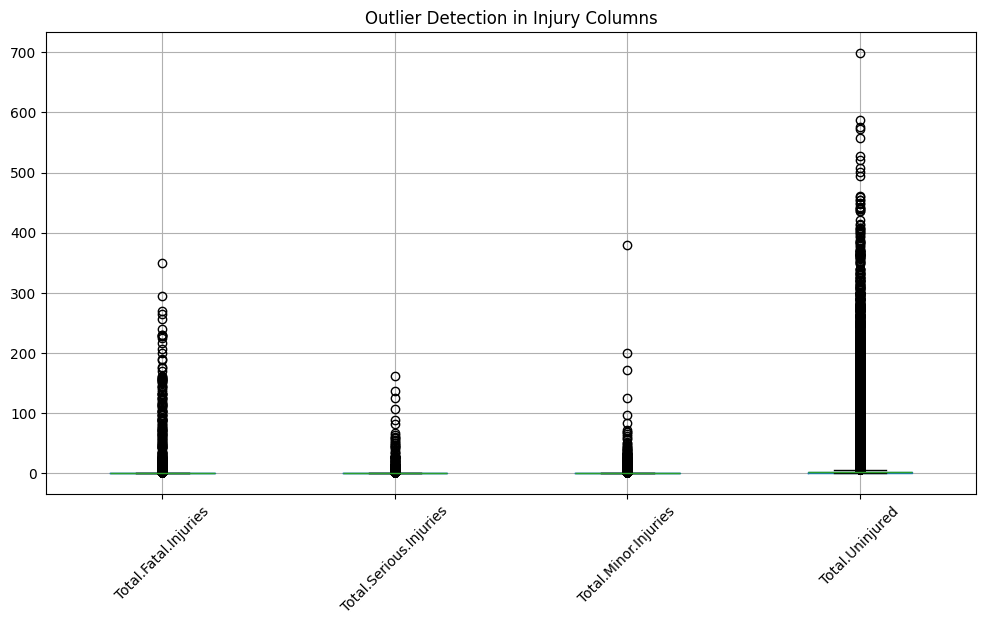

In [10]:
# Plot boxplots for key numerical columns
num_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title("Outlier Detection in Injury Columns")
plt.xticks(rotation=45)
plt.show()

###  Removing Outliers Using IQR  
Removing **outliers** using the **Interquartile Range (IQR) Method**.  

####  Columns Processed:  
- **Total.Fatal.Injuries**  
- **Total.Serious.Injuries**  
- **Total.Minor.Injuries**  
- **Total.Uninjured**

In [11]:
# remove outliers using IQR
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

    
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


df = remove_outliers(df, num_cols)

### Checking if Outliers Were Successfully Removed  
Verifying the changes by **plotting boxplots again**.

#### Expected Outcome:
- The **extreme points** (outliers) outside the whiskers should be **removed**.
- The distribution of data should now be **more compact and representative**.

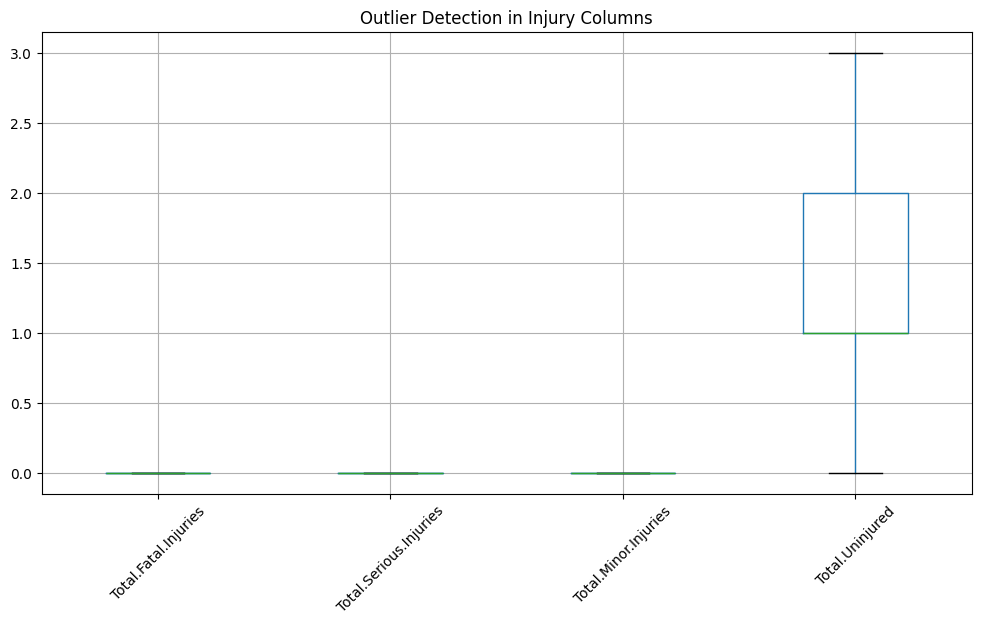

In [12]:
# check ouliers have been removed
num_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title("Outlier Detection in Injury Columns")
plt.xticks(rotation=45)
plt.show()

### Accident Trend Over Time  

The number of aviation accidents per year was analyzed to identify trends. This helped in understanding whether incidents increased or decreased over time.  

#### Visualization:

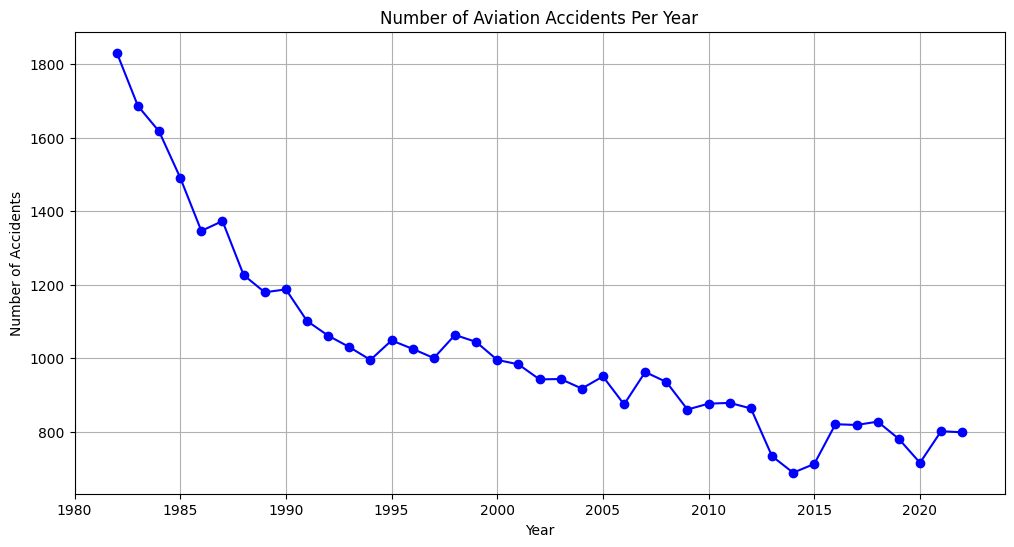

In [13]:
# Accident Trend Over Time
df['Year'] = df['Event.Date'].dt.year

plt.figure(figsize=(12, 6))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='b')
plt.title("Number of Aviation Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

## Yearly Aircraft Accidents by Manufacturer
To identify trends in aviation accidents over time, I analyzed the number of incidents per year for different aircraft manufacturers. This helps in understanding which manufacturers have had the highest accident rates historically and how their trends have changed over time.

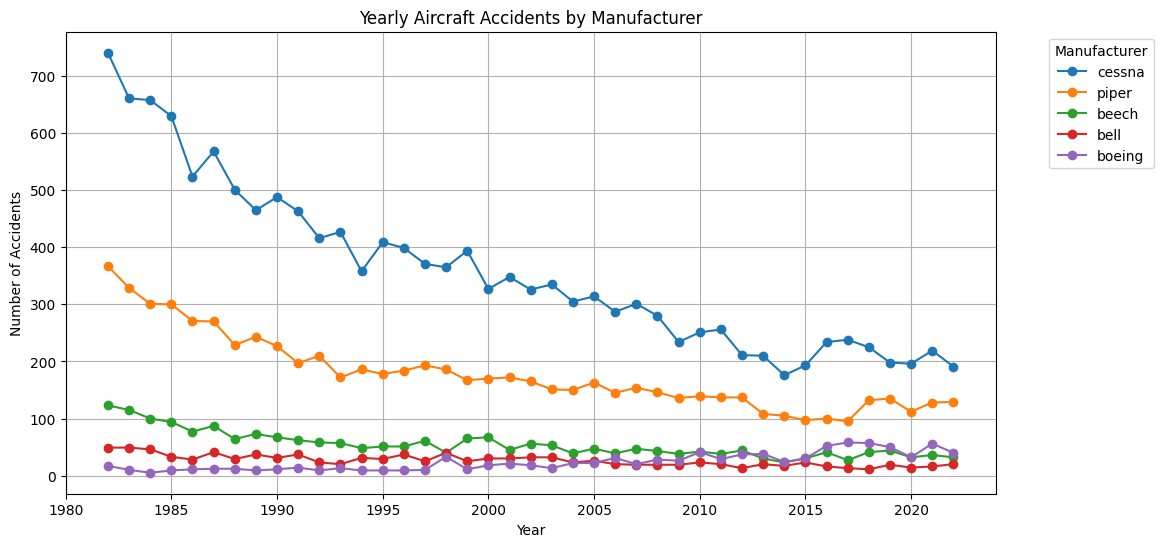

In [14]:
# Extracting the year from Event.Date
df['Event.Year'] = pd.to_datetime(df['Event.Date']).dt.year

# Counting accidents by year and manufacturer
yearly_make = df.groupby(['Event.Year', 'Make']).size().unstack().fillna(0)

# Gettig the top 5 manufacturers with the highest total accidents
top_makes_list = df['Make'].value_counts().head(5).index


yearly_make[top_makes_list].plot(figsize=(12, 6), marker='o')
plt.title("Yearly Aircraft Accidents by Manufacturer")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


### Accident Distribution by Injury Severity  

The dataset was analyzed to determine the distribution of aviation accidents based on injury severity. This provided insights into how frequently accidents resulted in fatalities, serious injuries, minor injuries, or no injuries.  

#### Visualization:

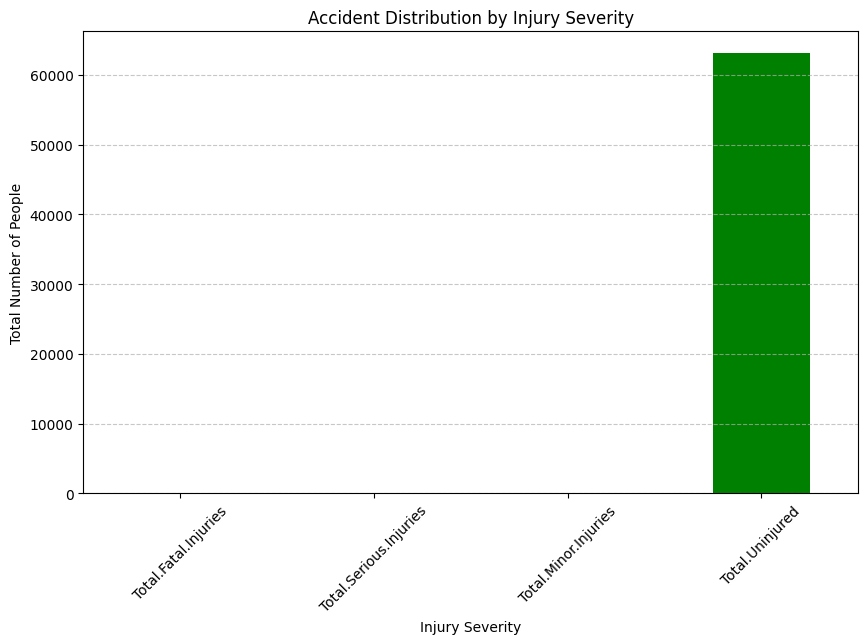

In [15]:
# Accident Distribution by Injury Severity
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
injury_counts = df[injury_cols].sum()

plt.figure(figsize=(10, 6))
injury_counts.plot(kind='bar', color=['red', 'orange', 'yellow', 'green'])
plt.title("Accident Distribution by Injury Severity")
plt.xlabel("Injury Severity")
plt.ylabel("Total Number of People")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Accidents by Country  

This visualization shows the top 10 countries with the highest number of aircraft accidents. Understanding accident distribution by country helps identify regions with the most recorded incidents, which could be influenced by factors such as air traffic density, regulatory policies, or operational conditions.  

A bar chart was used to display the accident count for each country, sorted in descending order.  

###### Insights:  
- The countries with the highest number of aircraft accidents are prominently visible.  
- This data can help aviation authorities focus on regions with higher accident occurrences for further investigation.

C:\Users\hezronkatila\AppData\Local\Temp\ipykernel_14940\326703483.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_r")


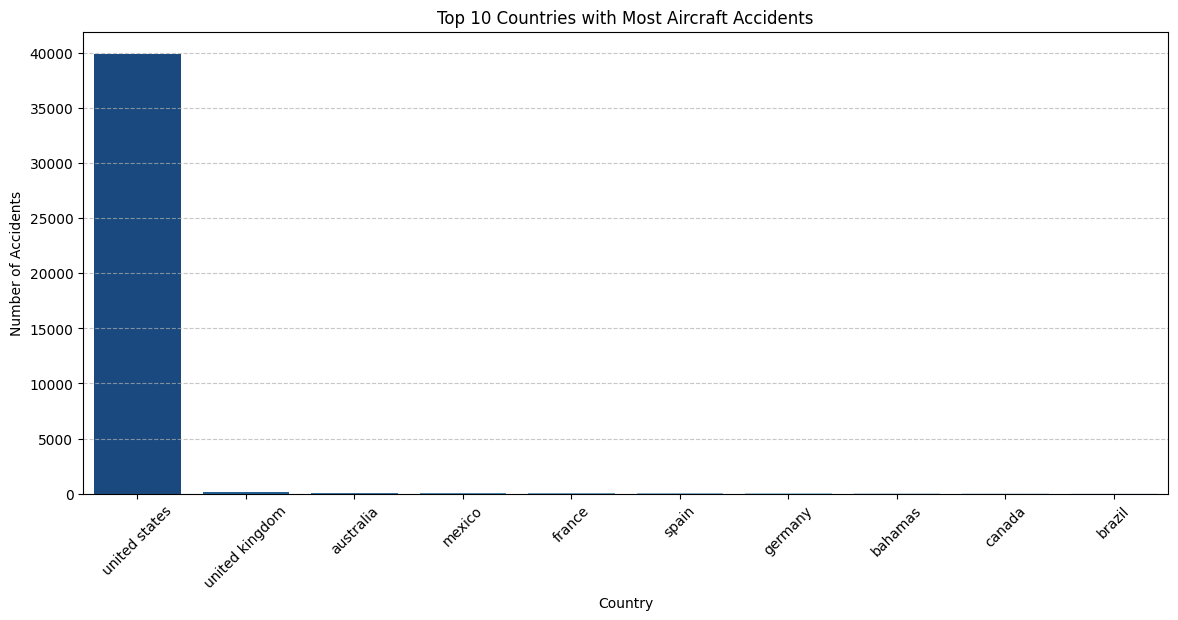

In [16]:
# Accidents by Country
plt.figure(figsize=(14, 6))
top_countries = df['Country'].value_counts().head(10)  # Get top 10 countries

sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_r")
plt.title("Top 10 Countries with Most Aircraft Accidents")
plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **Distribution of Injury Severity**  

The pie chart below represents the distribution of different injury severity levels in aircraft accidents. By visualizing this data, we can understand the proportion of accidents that resulted in fatal, serious, minor, or no injuries.  

- The largest section indicates the most common severity level in recorded accidents.  
- This helps in identifying trends and areas that may need further investigation or safety improvements.

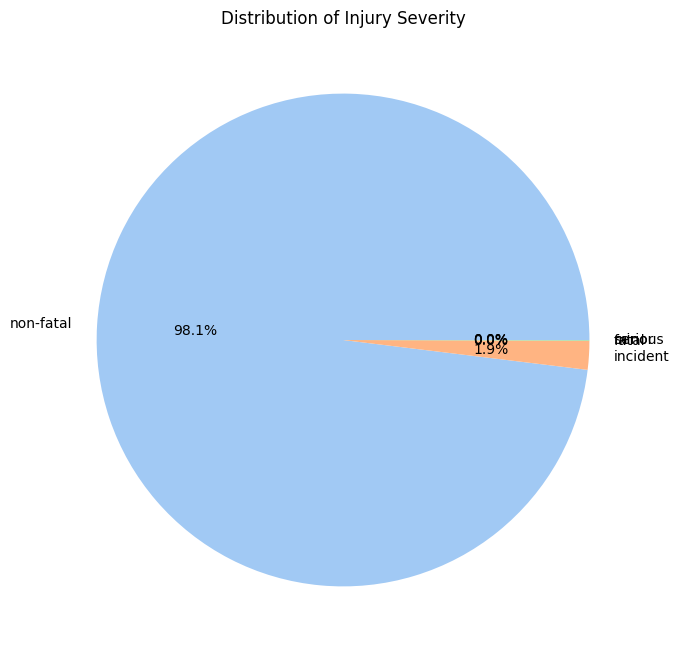

In [17]:
plt.figure(figsize=(8, 8))
df['Injury.Severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribution of Injury Severity")
plt.ylabel("")  # Hide y-label
plt.show()

#### **Top 10 Aircraft Manufacturers Involved in Accidents**  

The bar chart below displays the top 10 aircraft manufacturers with the highest number of recorded accidents.  

- The x-axis represents the number of accidents.  
- The y-axis lists the manufacturers.  
- This visualization helps identify which aircraft models have been most frequently involved in accidents, which could be due to higher production numbers, operational conditions, or other factors.

C:\Users\hezronkatila\AppData\Local\Temp\ipykernel_14940\4081644643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')


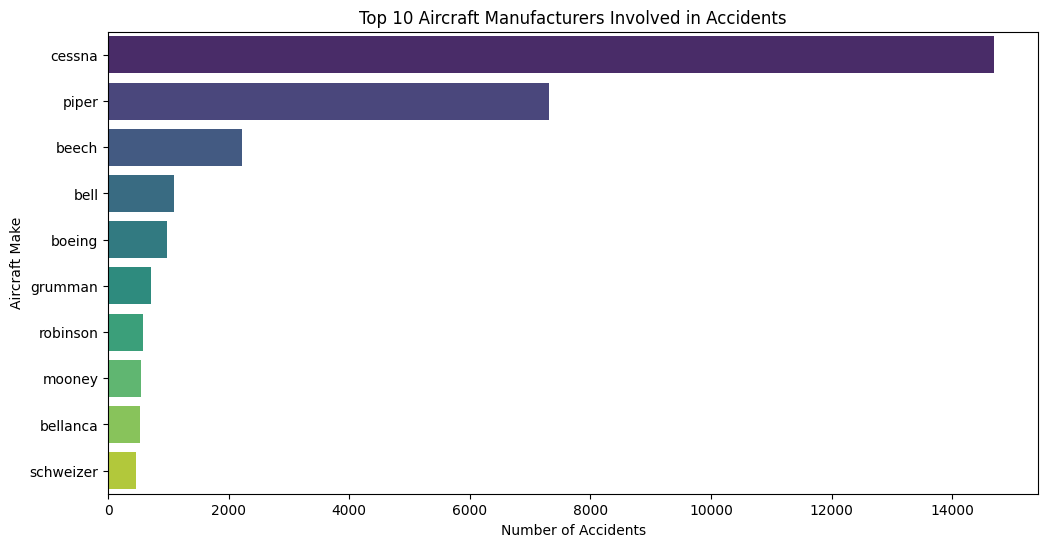

In [18]:
top_makes = df['Make'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
plt.title("Top 10 Aircraft Manufacturers Involved in Accidents")
plt.show()

## Top 10 Aircraft Models with Most Accidents
This analysis focuses on identifying the aircraft models with the highest number of recorded accidents. Understanding which models have been involved in the most incidents can provide valuable insights into potential risk factors and safety concerns.

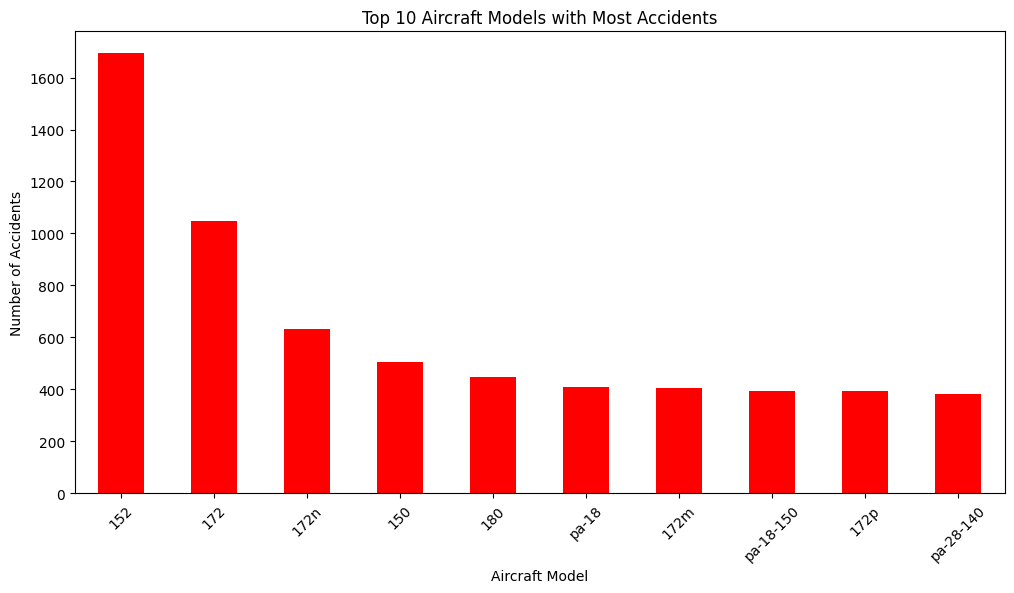

In [19]:
# Count accidents by aircraft model
top_models = df['Model'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_models.plot(kind='bar', color='red')
plt.title("Top 10 Aircraft Models with Most Accidents")
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


#### **Accidents by Phase of Flight**  

The bar chart below shows the number of aircraft accidents categorized by the phase of flight in which they occurred.  

- The x-axis represents the number of accidents.  
- The y-axis lists different phases of flight (e.g., takeoff, cruise, landing).  
- This analysis helps determine which flight phases are most prone to accidents, providing insights into critical risk periods during flight operations.

C:\Users\hezronkatila\AppData\Local\Temp\ipykernel_14940\2462185090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Broad.phase.of.flight'], order=df['Broad.phase.of.flight'].value_counts().index, palette='magma')


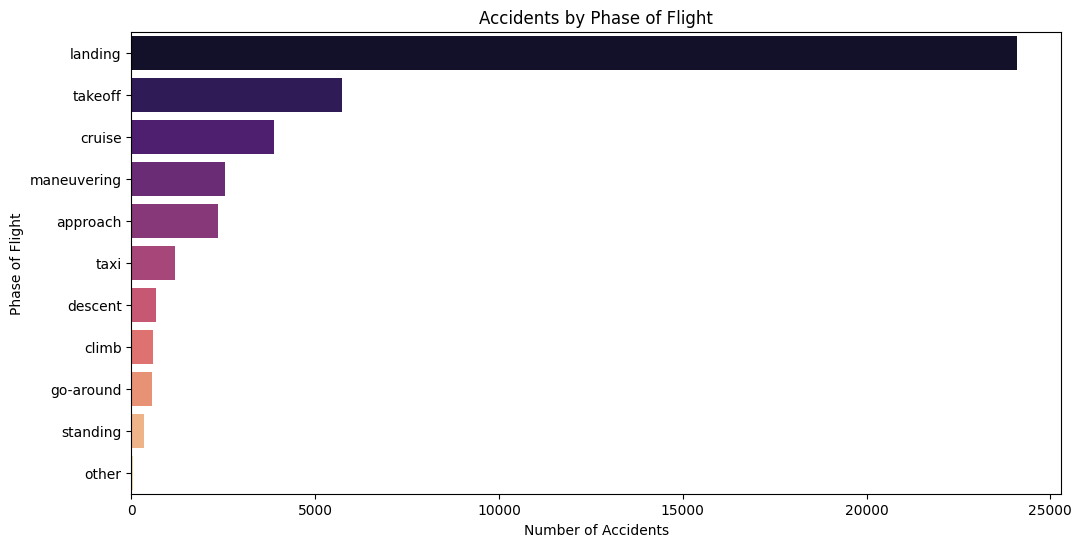

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Broad.phase.of.flight'], order=df['Broad.phase.of.flight'].value_counts().index, palette='magma')
plt.xlabel("Number of Accidents")
plt.ylabel("Phase of Flight")
plt.title("Accidents by Phase of Flight")
plt.show()

## **Insights from the Visualizations**  

### **1. Accident Trend Over Time**  
- The number of aircraft accidents fluctuates over the years, with noticeable spikes in certain periods.  
- Potential reasons for these peaks include changes in aviation regulations, increased air traffic, or improvements in accident reporting.  

### **2. Accidents by Country**  
- The **United States** has the highest number of accidents, likely due to its large aviation industry and high flight volume.  
- Other countries with significant accident rates may have high air traffic or less stringent safety regulations.  

### **3. Severity Distribution**  
- A substantial portion of incidents resulted in **minor injuries or no injuries**.  
- However, a notable percentage of accidents involved **fatalities**, underscoring the need for continuous safety improvements in aviation.  

### **4. Accidents by Aircraft Make & Model**  
- Certain aircraft manufacturers, such as **Cessna, Piper, and Boeing**, appear more frequently in accident records.  
- However, higher accident counts may correlate with the **overall number of aircraft in operation** rather than inherent safety issues.  
- The top **10 aircraft models** with the most accidents were identified, providing insights into potential risk factors.  

### **5. Phase of Flight Analysis**  
- The majority of accidents occur during the **takeoff and landing phases**, which are the most critical moments of flight.  
- **Cruise-phase accidents** are rare but tend to be severe when they do occur.  

---

# **Conclusion and Final Thoughts**  

## **Summary of Findings**  
- Aircraft accidents have shown fluctuations over time, with specific years experiencing noticeable spikes.  
- The **United States** has the highest number of recorded accidents, followed by other aviation-heavy regions.  
- Injury severity analysis reveals that while many accidents result in minor or no injuries, a significant number involve **fatalities or serious injuries**.  
- The **most frequently involved aircraft manufacturers** include major names like **Cessna, Piper, and Boeing**.  
- Most accidents occur during critical flight phases, specifically **takeoff and landing**.  
- Data inconsistencies, such as variations in categorical values, were cleaned to ensure analysis accuracy.  

## **Business Recommendations**  
1. **Prioritize Low-Risk Aircraft** – Select aircraft models with **low accident rates and strong safety records** for commercial and private operations.  
2. **Avoid High-Risk Models** – Exclude aircraft with a history of **high accident and fatality rates** from the purchase list.  
3. **Improve Aircraft Maintenance & Inspections** – Implement **stricter and more frequent maintenance checks** to prevent mechanical failures.  
4. **Enhance Pilot Training** – Focus on advanced training for **takeoff, landing, and emergency handling** to improve safety.  
5. **Consider Manufacturer Reputation** – Opt for **manufacturers with proven reliability** and lower accident frequency.  
6. **Strengthen Safety Measures for Critical Flight Phases** – Since most accidents happen during **takeoff and landing**, emphasize **pilot preparedness and weather monitoring**.  

By leveraging **data-driven insights**, the company can make informed decisions when selecting aircraft, ultimately enhancing **safety, reliability, and risk management** in its aviation venture.

In [21]:
#df.to_csv("AviationDt_clean.csv" ,index=False)
#df.to_excel("AviationData_clean.xlsx", index=False, engine="openpyxl")